In [1]:
#A.import the necessary packages
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.optimizers import SGD

In [2]:
#B.Load the training and testing data (MNIST/CIFAR10)
data=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=data.load_data()
x_train,x_test =x_train/255,x_test/255      # Covert all values between 0 to 1 
print(x_test.shape)
print(x_train.shape)

(10000, 28, 28)
(60000, 28, 28)


In [3]:
#C.Define the network architecture using Keras
model=tf.keras.models.Sequential([
tf.keras.layers.Flatten(input_shape=(28,28)),      # covert 2D into  1D  
tf.keras.layers.Dense(150,activation='relu'),      #  Dense Means Fully connected Network in Hiden Layer
tf.keras.layers.Dense(10,activation='softmax')     # classifying into 10 classes output have TEN neuron
])

In [4]:
#D.Train the model using SGD
sgd=SGD(0.02)    # is learning rate  0.02            #adam
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(x_train, y_train,validation_data=(x_test,y_test),epochs=5) # Train the model

Epoch 1/5
1875/1875 [==============================] - 24s 11ms/step - loss: 0.6305 - accuracy: 0.8431 - val_loss: 0.3532 - val_accuracy: 0.9038
Epoch 2/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3335 - accuracy: 0.9069 - val_loss: 0.2898 - val_accuracy: 0.9198
Epoch 3/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2853 - accuracy: 0.9190 - val_loss: 0.2573 - val_accuracy: 0.9268
Epoch 4/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2551 - accuracy: 0.9283 - val_loss: 0.2345 - val_accuracy: 0.9328
Epoch 5/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2320 - accuracy: 0.9352 - val_loss: 0.2168 - val_accuracy: 0.9376


313/313 [==============================] - 3s 7ms/step
4


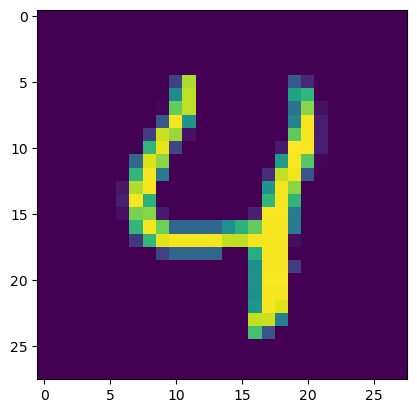

In [5]:
#E. Evaluate the network
test_loss,test_acc=model.evaluate(x_test,y_test)
plt.imshow(x_test[4])
prediction=model.predict(x_test)   #predict the data   
print(np.argmax(prediction[4]))   # print data depend on max probaiblites 

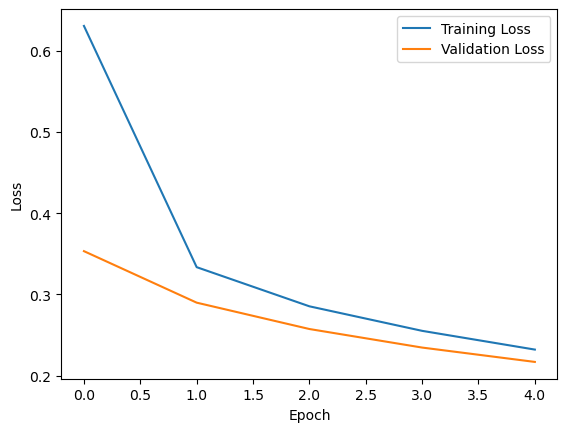

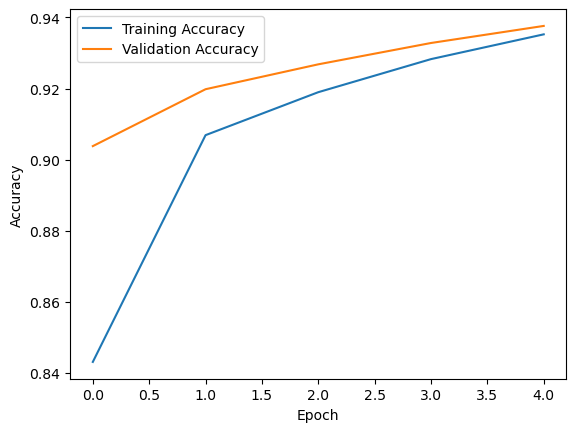

In [6]:
# F.Plot the training loss and accuracy
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()